# Gaussian NB classifier, on all datasets

#### Import statements

In [10]:
from sklearn import metrics, datasets
from sklearn.naive_bayes import GaussianNB
import numpy as np
import MNIST
%config IPCompleter.greedy=True


### 1. Digits dataset
Load and split into 70% training and 30% test

In [11]:
digits = datasets.load_digits()

digits.data
digits.data.shape

num_split = int(0.7*len(digits.data))
train_features = digits.data[:num_split]
train_labels =  digits.target[:num_split]
test_features = digits.data[num_split:]
test_labels = digits.target[num_split:]

print("Number of training examples: ",len(train_features))
print("Number of test examples: ",len(test_features))
print("Number of total examples:", len(train_features)+len(test_features))

Number of training examples:  1257
Number of test examples:  540
Number of total examples: 1797


In [12]:
print(train_features.shape)
print(train_labels[:30])


(1257, 64)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


In [13]:
gnb = GaussianNB()
gnb.fit(train_features, train_labels)
y_pred = gnb.predict(test_features)

In [14]:
print("Classification report SKLearn digits:\n%s\n"
% (metrics.classification_report(test_labels, y_pred)))
print("Confusion matrix SKLearn digits:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

Classification report SKLearn digits:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.65      0.79      0.71        53
           2       0.98      0.81      0.89        53
           3       0.92      0.64      0.76        53
           4       1.00      0.86      0.92        57
           5       0.83      0.93      0.87        56
           6       0.96      0.98      0.97        54
           7       0.73      0.83      0.78        54
           8       0.59      0.71      0.64        52
           9       0.82      0.73      0.77        55

    accuracy                           0.83       540
   macro avg       0.84      0.82      0.83       540
weighted avg       0.84      0.83      0.83       540


Confusion matrix SKLearn digits:
[[51  0  0  0  0  0  0  0  2  0]
 [ 0 42  1  0  0  0  0  0  3  7]
 [ 0  5 43  1  0  0  1  0  1  2]
 [ 0  3  0 34  0  3  0  2 11  0]
 [ 1  0  0  0 49  0  0  6  1  0]
 [ 0

### 2. Digits summarised dataset

Load data and minify the data to dark, gray and light values

In [15]:
flat_digits_data = digits.data.flatten()

digits_data_summarised = np.zeros(len(flat_digits_data))
for i,x in enumerate(flat_digits_data):
    if x < 5:
        digits_data_summarised[i] = 0 #dark
    elif x > 10:
        digits_data_summarised[i] = 2 #light
    else:
        digits_data_summarised[i] = 1 #gray
        
digits_data_summarised = digits_data_summarised.reshape(digits.data.shape)

print(digits.data.shape)
print(digits_data_summarised.shape)

(1797, 64)
(1797, 64)


Split into training and test set. 70/30

In [16]:
num_split = int(0.7*len(digits.data))
train_features = digits_data_summarised[:num_split]
train_labels =  digits.target[:num_split]
test_features = digits_data_summarised[num_split:]
test_labels = digits.target[num_split:]

print("Number of training examples: ",len(train_features))
print("Number of test examples: ",len(test_features))
print("Number of total examples:", len(train_features)+len(test_features))

Number of training examples:  1257
Number of test examples:  540
Number of total examples: 1797


In [17]:
print(train_features.shape)
print(train_labels.shape)

(1257, 64)
(1257,)


In [18]:
gnb = GaussianNB()
gnb.fit(train_features, train_labels)
y_pred = gnb.predict(test_features)

In [19]:
print("Classification report SKLearn digits_summarised:\n%s\n"
% (metrics.classification_report(test_labels, y_pred)))
print("Confusion matrix SKLearn digits_summarised:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

Classification report SKLearn digits_summarised:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.86      0.34      0.49        53
           2       0.97      0.62      0.76        53
           3       1.00      0.19      0.32        53
           4       0.95      0.91      0.93        57
           5       0.94      0.57      0.71        56
           6       0.96      0.96      0.96        54
           7       0.82      0.85      0.84        54
           8       0.31      0.92      0.46        52
           9       0.63      0.78      0.70        55

    accuracy                           0.71       540
   macro avg       0.84      0.71      0.71       540
weighted avg       0.84      0.71      0.71       540


Confusion matrix SKLearn digits_summarised:
[[50  0  0  0  1  0  0  0  2  0]
 [ 0 18  0  0  0  0  0  1 22 12]
 [ 1  0 33  0  0  0  0  0 18  1]
 [ 0  1  0 10  0  0  0  1 34  7]
 [ 0  0  0  0 5

### 3. MNIST_light dataset

Load dataset and split

In [11]:
mnist = MNIST.MNISTData('MNIST_Light/*/*.png')


train_features, test_features, train_labels, test_labels = mnist.get_data()  #70% train, 30% test


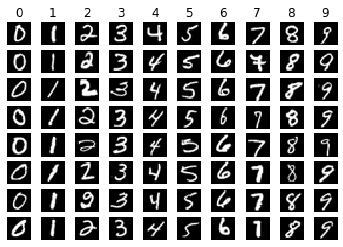

In [12]:
mnist.visualize_random()

In [13]:
gnb = GaussianNB()
gnb.fit(train_features, train_labels)
y_pred = gnb.predict(test_features)

In [14]:
print("Classification report SKLearn GNB:\n%s\n"
% (metrics.classification_report(test_labels, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.54      0.94      0.69       164
           1       0.71      0.94      0.81       152
           2       0.83      0.50      0.62       155
           3       0.83      0.53      0.65       154
           4       0.75      0.31      0.44       143
           5       0.67      0.16      0.25       141
           6       0.81      0.85      0.83       143
           7       0.83      0.82      0.83       158
           8       0.41      0.64      0.50       132
           9       0.60      0.84      0.70       158

    accuracy                           0.66      1500
   macro avg       0.70      0.65      0.63      1500
weighted avg       0.70      0.66      0.64      1500


Confusion matrix SKLearn GNB:
[[154   0   6   0   1   1   0   0   1   1]
 [  1 143   1   0   0   1   0   1   3   2]
 [ 11   6  77  10   2   1  19   1  27   1]
 [ 32  11   5  82   0   0   2   3  12   7]
 [ 

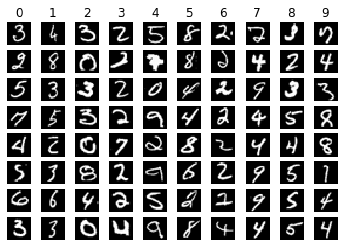

In [15]:
mnist.visualize_wrong_class(y_pred, 8)